In [1]:
#Load required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,RidgeCV
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.svm import SVR
from sklearn.decomposition import *
from sklearn.metrics import mean_squared_error,make_scorer
import matplotlib.pyplot as plt


In [2]:
#Load the normalized data from previous steps with HDI
df = pd.read_pickle('Pickles/normalDataFromAngeloWithHDI.pickle')
df.head()

,State,HDI,awards_per_value,exp_award_value,High_School_Fee,Elementary_School_Fee,Colleges_universities_per_1000000,Junior_colleges_per_1000000,Prof_schools_per_1000000,Intensive_top_230_score,...,Property_crime,Burglary,Theft,Motor_Vehicle_theft,Per_capita_income,Price_2018_Studio,Price_2018_1br,Price_2018_2br,Price_2018_3br,Price_2018_4br
1,alabama,0.882,19.514493,63013.173913,7718.0,6388.0,8.636111,7.402381,3.289947,75.257541,...,2947.8,700.5,2006.3,241.1,38215.0,605.416667,659.000000,800.666667,1069.666667,1244.333333
2,alaska,0.942,18.414286,141431.142857,6118.0,7544.0,8.087409,1.347901,2.695803,39.089142,...,3353.0,546.3,2394.7,412.1,54430.0,814.333333,930.500000,1190.333333,1682.166667,2019.500000
3,arizona,0.912,25.563492,47830.888889,17339.0,6283.0,6.636781,6.203947,6.059670,30.154070,...,2978.4,544.4,2168.1,265.8,39955.0,701.000000,828.000000,1046.000000,1512.333333,1754.416667
4,arkansas,0.882,21.970833,51132.479167,6680.0,4698.0,8.700750,8.700750,10.708616,32.125848,...,3268.6,795.5,2233.6,239.4,39171.0,524.666667,571.166667,721.416667,977.583333,1144.833333
5,california,0.934,22.771429,63022.202857,19317.0,11363.0,6.726112,4.866240,6.089169,78.063660,...,2553.0,479.8,1623.0,450.3,54800.0,1212.333333,1426.333333,1818.916667,2519.250000,2926.333333


We remove the State names and set the HDI values as the output `y` and the remaining features as the data `X`.

In [3]:

States = df.State.tolist()
X = df.drop(["State", "HDI"], axis = 1)
y = df.HDI
X.head()

,awards_per_value,exp_award_value,High_School_Fee,Elementary_School_Fee,Colleges_universities_per_1000000,Junior_colleges_per_1000000,Prof_schools_per_1000000,Intensive_top_230_score,Life_Expectancy,mc_donalds_per_100k,...,Property_crime,Burglary,Theft,Motor_Vehicle_theft,Per_capita_income,Price_2018_Studio,Price_2018_1br,Price_2018_2br,Price_2018_3br,Price_2018_4br
1,19.514493,63013.173913,7718.0,6388.0,8.636111,7.402381,3.289947,75.257541,74.813987,5.0,...,2947.8,700.5,2006.3,241.1,38215.0,605.416667,659.000000,800.666667,1069.666667,1244.333333
2,18.414286,141431.142857,6118.0,7544.0,8.087409,1.347901,2.695803,39.089142,78.915541,4.2,...,3353.0,546.3,2394.7,412.1,54430.0,814.333333,930.500000,1190.333333,1682.166667,2019.500000
3,25.563492,47830.888889,17339.0,6283.0,6.636781,6.203947,6.059670,30.154070,78.364742,4.1,...,2978.4,544.4,2168.1,265.8,39955.0,701.000000,828.000000,1046.000000,1512.333333,1754.416667
4,21.970833,51132.479167,6680.0,4698.0,8.700750,8.700750,10.708616,32.125848,75.626900,5.8,...,3268.6,795.5,2233.6,239.4,39171.0,524.666667,571.166667,721.416667,977.583333,1144.833333
5,22.771429,63022.202857,19317.0,11363.0,6.726112,4.866240,6.089169,78.063660,80.231014,3.3,...,2553.0,479.8,1623.0,450.3,54800.0,1212.333333,1426.333333,1818.916667,2519.250000,2926.333333


In [4]:
#Checking statistics for the features and the output.
df.describe()

,HDI,awards_per_value,exp_award_value,High_School_Fee,Elementary_School_Fee,Colleges_universities_per_1000000,Junior_colleges_per_1000000,Prof_schools_per_1000000,Intensive_top_230_score,Life_Expectancy,...,Property_crime,Burglary,Theft,Motor_Vehicle_theft,Per_capita_income,Price_2018_Studio,Price_2018_1br,Price_2018_2br,Price_2018_3br,Price_2018_4br
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.922608,22.971176,66598.569680,13727.039216,7746.490196,10.322356,6.099607,7.190986,106.032031,78.262064,...,2504.064706,470.958824,1803.998039,229.107843,47125.901961,744.338235,848.303922,1054.060458,1421.009804,1657.477124
std,0.022469,2.215785,19730.887539,7600.441232,3377.477398,5.329495,2.884458,3.339187,156.409183,1.705511,...,674.554242,162.708761,494.491131,114.559621,7462.990763,220.293414,243.846978,293.103948,393.657178,475.658306
min,0.867000,18.414286,45130.875000,5375.000000,2550.000000,1.707939,0.000000,1.707939,11.564398,74.813987,...,1512.900000,201.700000,1135.200000,45.100000,34752.000000,486.333333,564.333333,721.416667,968.166667,1098.416667
25%,0.909500,21.887917,51720.242949,8107.500000,5089.500000,7.268301,4.382072,4.740343,45.121019,76.861272,...,1945.300000,342.250000,1436.200000,150.950000,42031.500000,564.541667,654.041667,821.791667,1100.250000,1261.708333
50%,0.927000,23.519917,60872.722222,11149.000000,7750.000000,8.748948,5.777315,6.714499,71.888278,78.546753,...,2586.600000,431.400000,1832.300000,220.800000,45733.000000,693.500000,783.833333,969.500000,1285.083333,1463.250000
75%,0.940000,24.451859,72419.318470,16128.000000,9421.000000,12.547509,7.396813,9.417573,99.102824,79.528299,...,2949.650000,561.100000,2060.850000,273.200000,50332.000000,864.083333,975.541667,1210.750000,1664.250000,1952.166667
max,0.959000,26.992614,141431.142857,33893.000000,20047.000000,32.020801,15.371451,16.929696,1111.323165,81.314894,...,4802.900000,830.400000,4019.800000,564.300000,70167.000000,1397.583333,1468.333333,1818.916667,2519.250000,2926.333333


Note that the features have different ranges which may distort our regression techniques. To overcome this, we need to perform some kind of normalization or scaling. We perform a MinMax Scaling (from sklearn) on our data input `X` to scale all features between `[0,1]`. Further, the true HDI values have a very small range and standard deviation, this means that even a model which predicts just a constant value equal to the mean will have a small overall Mean Square Error. To overcome this and make our model evaluation more realistic, we scale the outputs `y` to `[0,1]`. Further, we store the scalers as we will need to invert the predict values for our models back to true HDI range.

In [5]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X.values)
Y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

# Linear Regression

In [6]:
linReg = LinearRegression()
Y_pred_scaled = cross_val_predict(linReg,X_scaled,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {} ".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSELinReg = mean_squared_error(Y_pred,y)

R2 value =  0.9725698807776534 


In [7]:
linRegNorm = LinearRegression(normalize=True)
Y_pred_scaled = cross_val_predict(linRegNorm,X_scaled,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSELinRegNormalized = mean_squared_error(Y_pred,y)

R2 value =  0.9725698807776622


#### With normalized inputs

### adding polynomial augmentation

In [8]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_scaled)
Y_pred_scaled = cross_val_predict(linReg,X_poly,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSELinRegPoly = mean_squared_error(Y_pred,y)

R2 value =  0.9950776695473653


In [9]:
Y_pred_scaled = cross_val_predict(linRegNorm,X_poly,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSELinRegPolyNormalized = mean_squared_error(Y_pred,y)

R2 value =  0.9755794006812706


#### With normalized inputs

So we have a tendency to overfit

# Ridge Regression

In [10]:
alphas = np.arange(0.01,1,0.01)
regr_cv = RidgeCV(alphas=alphas,fit_intercept=True,cv=5)
model_cv = regr_cv.fit(X_scaled, Y_scaled)
Y_pred_scaled = model_cv.predict(X_scaled)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSERidReg = mean_squared_error(Y_pred,y)

R2 value =  0.9987759717793506


#### With normalized inputs

In [11]:
regr_cv_norm = RidgeCV(alphas=alphas,fit_intercept=True,cv=5,normalize=True)
model_cv_norm = regr_cv_norm.fit(X_scaled, Y_scaled)
Y_pred_scaled = model_cv_norm.predict(X_scaled)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSERidRegNormalized = mean_squared_error(Y_pred,y)

R2 value =  0.998475364181839


### adding polynomial augmentation

In [12]:
model_cv = regr_cv.fit(X_poly, Y_scaled)
Y_pred_scaled = model_cv.predict(X_poly)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSERidRegPoly = mean_squared_error(Y_pred,y)

R2 value =  0.9996640192673864


In [13]:
model_cv_norm = regr_cv_norm.fit(X_poly, Y_scaled)
Y_pred_scaled = model_cv_norm.predict(X_poly)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSERidRegPolyNormalized = mean_squared_error(Y_pred,y)

R2 value =  0.9996596364913635


# SVR

In [14]:
parameters = {'kernel' :['rbf','linear','sigmoid','poly'],'C' : np.exp(np.arange(-6,6))}
estimator = SVR(gamma = 'auto')
clf = GridSearchCV(estimator,parameters,cv = 5,iid=True)
clf.fit(X_scaled, Y_scaled.reshape(-1,))
Y_pred_scaled = clf.predict(X_scaled).reshape(-1,1)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSESVR = mean_squared_error(Y_pred,y)

R2 value =  0.9979270892865502


C:\Users\loris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [15]:
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio {}".format(100.0*np.sum(pca.explained_variance_ratio_)))
Y_pred_scaled = cross_val_predict(linReg,X_pca,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {} ".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSELinReg5PCA = mean_squared_error(Y_pred,y)

Explained Variance Ratio 81.14995449697238
R2 value =  0.9938021507559861 


In [16]:
Y_pred_scaled = cross_val_predict(linRegNorm,X_pca,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSELinReg5PCANormalized = mean_squared_error(Y_pred,y)

R2 value =  0.993802150755986


In [17]:
pca_poly = PCA(n_components = 5)
X_pca_poly = pca_poly.fit_transform(X_poly)
print("Explained Variance Ratio {}".format(100.0*np.sum(pca_poly.explained_variance_ratio_)))
Y_pred_scaled = cross_val_predict(linReg,X_pca_poly,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSELinRegPoly5PCA = mean_squared_error(Y_pred,y)

Explained Variance Ratio 80.19704791896278
R2 value =  0.992255657455196


In [18]:
Y_pred_scaled = cross_val_predict(linRegNorm,X_pca_poly,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSELinRegPoly5PCANormalized = mean_squared_error(Y_pred,y)

R2 value =  0.992255657455196


In [19]:
model_cv = regr_cv.fit(X_pca, Y_scaled)
Y_pred_scaled = model_cv.predict(X_pca)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSERidReg5PCA = mean_squared_error(Y_pred,y)

R2 value =  0.9954439765911506


In [20]:
model_cv_norm = regr_cv_norm.fit(X_pca, Y_scaled)
Y_pred_scaled = model_cv_norm.predict(X_pca)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSERidReg5PCANormalized = mean_squared_error(Y_pred,y)

R2 value =  0.9954074348052442


In [21]:
model_cv = regr_cv.fit(X_pca_poly, Y_scaled)
Y_pred_scaled = model_cv.predict(X_pca_poly)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSERidRegPoly5PCA = mean_squared_error(Y_pred,y)

R2 value =  0.9951815168309915


In [22]:
model_cv_norm = regr_cv_norm.fit(X_pca_poly, Y_scaled)
Y_pred_scaled = model_cv_norm.predict(X_pca_poly)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSERidRegPoly5PCANormalized = mean_squared_error(Y_pred,y)

R2 value =  0.9948865433717219


In [23]:
parameters = {'kernel' :['rbf','linear','sigmoid','poly'],'C' : np.exp(np.arange(-6,6))}
estimator = SVR(gamma = 'auto')
clf = GridSearchCV(estimator,parameters,cv = 5,iid=True)
clf.fit(X_pca, Y_scaled.reshape(-1,))
Y_pred_scaled = clf.predict(X_pca).reshape(-1,1)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSESVR5PCA = mean_squared_error(Y_pred,y)

R2 value =  0.9951755747821499


C:\Users\loris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [24]:
education_list = ['Colleges_universities_per_1000000', 'Junior_colleges_per_1000000', 
                  'Prof_schools_per_1000000', 'awards_per_value', 'exp_award_value', 'Intensive_top_230_score',
                  'High_School_Fee', 'Elementary_School_Fee']
health_list = ['Life_Expectancy', 'mc_donalds_per_100k', 'mean_obesity',
               'eating_vegetables_daily', 'eating_vegetables_daily', 'diabetes_prevalence', 'alcohol_prevalence',
               'mean_physical_activity', 'mean_obesity']
security_list = [ 'alcohol_prevalence', 'Homeless_per_100000', 'Violent_Crime',
                 'Murder_and_Manslaughter', 'Rape', 'Robbery', 'Aggravated_Assoult', 'Property_crime',
                 'Burglary', 'Theft', 'Motor_Vehicle_theft']
economy_list = ['Per_capita_income', 'mc_donalds_per_100k', 'Price_2018_Studio',
                'Price_2018_1br',  'Price_2018_2br', 'Price_2018_3br', 'Price_2018_4br', 'Homeless_per_100000',
                'Elementary_School_Fee', 'High_School_Fee']

In [25]:
df.columns

Index(['State', 'HDI', 'awards_per_value', 'exp_award_value',
       'High_School_Fee', 'Elementary_School_Fee',
       'Colleges_universities_per_1000000', 'Junior_colleges_per_1000000',
       'Prof_schools_per_1000000', 'Intensive_top_230_score',
       'Life_Expectancy', 'mc_donalds_per_100k', 'eating_vegetables_daily',
       'diabetes_prevalence', 'alcohol_prevalence', 'mean_physical_activity',
       'mean_obesity', 'Homeless_per_100000', 'Violent_Crime',
       'Murder_and_Manslaughter', 'Rape', 'Robbery', 'Aggravated_Assoult',
       'Property_crime', 'Burglary', 'Theft', 'Motor_Vehicle_theft',
       'Per_capita_income', 'Price_2018_Studio', 'Price_2018_1br',
       'Price_2018_2br', 'Price_2018_3br', 'Price_2018_4br'],
      dtype='object')

In [26]:
df_education = df[education_list]
df_health = df[health_list]
df_security = df[security_list]
df_economy = df[economy_list]

In [27]:
pca_comp = PCA(n_components=2)

In [28]:
cat_data_scaled = scaler_x.fit_transform(df_education)
cat_data_poly = poly.fit_transform(cat_data_scaled)
ed_feature = pca_comp.fit_transform(cat_data_scaled)
print("Explained Variance Ratio for Education {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))
ed_feature_poly = pca_comp.fit_transform(cat_data_poly)
print("Explained Variance Ratio for Education Polynomial {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))

cat_data_scaled = scaler_x.fit_transform(df_health)
cat_data_poly = poly.fit_transform(cat_data_scaled)
health_feature = pca_comp.fit_transform(cat_data_scaled)
print("Explained Variance Ratio for Health {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))
health_feature_poly = pca_comp.fit_transform(cat_data_poly)
print("Explained Variance Ratio for Health Polynomial {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))

cat_data_scaled = scaler_x.fit_transform(df_security)
cat_data_poly = poly.fit_transform(cat_data_scaled)
security_feature = pca_comp.fit_transform(cat_data_scaled)
print("Explained Variance Ratio for Security {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))
security_feature_poly = pca_comp.fit_transform(cat_data_poly)
print("Explained Variance Ratio for Security Polynomial {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))

cat_data_scaled = scaler_x.fit_transform(df_economy)
cat_data_poly = poly.fit_transform(cat_data_scaled)
economy_feature = pca_comp.fit_transform(cat_data_scaled)
print("Explained Variance Ratio for Economy {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))
economy_feature_poly = pca_comp.fit_transform(cat_data_poly)
print("Explained Variance Ratio for Economy Polynomial {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))

Explained Variance Ratio for Education 62.436296435984076
Explained Variance Ratio for Education Polynomial 60.63424340019754
Explained Variance Ratio for Health 79.07785442197368
Explained Variance Ratio for Health Polynomial 76.37189248700496
Explained Variance Ratio for Security 73.20173188347201
Explained Variance Ratio for Security Polynomial 78.06684363670395
Explained Variance Ratio for Economy 85.34571192207696
Explained Variance Ratio for Economy Polynomial 84.25926215053322


In [29]:
cat_data = pd.DataFrame(data = np.hstack((ed_feature,health_feature,security_feature,economy_feature)),\
                        columns = ["Education1","Education2","Health1","Health2","Security1","Security2","Economy1","Economy2"])
cat_data.head()

,Education1,Education2,Health1,Health2,Security1,Security2,Economy1,Economy2
0,-0.058614,0.518308,1.088307,-0.062581,0.433284,-0.366793,-0.598361,0.092652
1,0.439150,0.761389,-0.379155,-0.029016,0.872818,0.309678,0.261010,0.153895
2,-0.168710,-0.253282,-0.263936,-0.169542,0.258061,-0.066875,0.000732,-0.105762
3,-0.366289,0.119031,0.951237,0.061179,0.587030,-0.379195,-0.823032,0.261737
4,0.191689,-0.042024,-0.638627,-0.245933,0.198335,0.094236,1.512800,0.145417


In [30]:
cat_data_poly = pd.DataFrame(data = np.hstack((ed_feature_poly,health_feature_poly,security_feature_poly,economy_feature_poly)),\
                        columns = ["Education1","Education2","Health1","Health2","Security1","Security2","Economy1","Economy2"])
cat_data_poly.head()

,Education1,Education2,Health1,Health2,Security1,Security2,Economy1,Economy2
0,-0.229575,0.738826,2.207961,-0.245896,0.384528,-0.772236,-1.018544,0.125706
1,0.303915,1.114270,-0.784043,-0.019102,1.909214,-0.452232,0.219950,0.373881
2,-0.241620,-0.358124,-0.602901,-0.371477,0.244499,-0.254109,-0.309678,-0.123173
3,-0.516248,0.118484,2.038143,0.182909,0.688669,-1.091436,-1.219261,0.307282
4,0.204182,0.078507,-1.210237,-0.535429,0.231954,-0.050517,3.400586,0.693676


In [31]:
X_cat = cat_data.values
Y_pred_scaled = cross_val_predict(linReg,X_cat,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {} ".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSELinRegAll2PCA = mean_squared_error(Y_pred,y)

R2 value =  0.9927978989523064 


In [32]:
Y_pred_scaled = cross_val_predict(linRegNorm,X_cat,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSELinRegAll2PCANormalized = mean_squared_error(Y_pred,y)

R2 value =  0.9927978989523064


In [33]:
X_cat_poly = cat_data_poly.values
Y_pred_scaled = cross_val_predict(linReg,X_cat_poly,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSELinRegAll2PCAPoly = mean_squared_error(Y_pred,y)

R2 value =  0.9930305992643044


In [34]:
Y_pred_scaled = cross_val_predict(linRegNorm,X_cat_poly,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSELinRegAll2PCAPolyNormalized = mean_squared_error(Y_pred,y)

R2 value =  0.9930305992643044


In [35]:
model_cv = regr_cv.fit(X_cat, Y_scaled)
Y_pred_scaled = model_cv.predict(X_cat)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSERidRegAll2PCA = mean_squared_error(Y_pred,y)

R2 value =  0.995740695380593


In [36]:
model_cv_norm = regr_cv_norm.fit(X_cat, Y_scaled)
Y_pred_scaled = model_cv_norm.predict(X_cat)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSERidRegAll2PCANormalized = mean_squared_error(Y_pred,y)

R2 value =  0.9953299026190899


In [37]:
model_cv = regr_cv.fit(X_cat_poly, Y_scaled)
Y_pred_scaled = model_cv.predict(X_cat_poly)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSERidRegAll2PCAPoly = mean_squared_error(Y_pred,y)

R2 value =  0.996216117727382


In [38]:
model_cv_norm = regr_cv_norm.fit(X_cat_poly, Y_scaled)
Y_pred_scaled = model_cv_norm.predict(X_cat_poly)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSERidRegAll2PCAPolyNormalized = mean_squared_error(Y_pred,y)

R2 value =  0.9958547741268508


In [39]:
parameters = {'kernel' :['rbf','linear','sigmoid','poly'],'C' : np.exp(np.arange(-6,6))}
estimator = SVR(gamma = 'auto')
clf = GridSearchCV(estimator,parameters,cv = 5,iid=True)
clf.fit(X_cat, Y_scaled.reshape(-1,))
Y_pred_scaled = clf.predict(X_cat).reshape(-1,1)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

MSESVRAll2PCA = mean_squared_error(Y_pred,y)

R2 value =  0.9953447085053553


C:\Users\loris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [40]:
df.head()

,State,HDI,awards_per_value,exp_award_value,High_School_Fee,Elementary_School_Fee,Colleges_universities_per_1000000,Junior_colleges_per_1000000,Prof_schools_per_1000000,Intensive_top_230_score,...,Property_crime,Burglary,Theft,Motor_Vehicle_theft,Per_capita_income,Price_2018_Studio,Price_2018_1br,Price_2018_2br,Price_2018_3br,Price_2018_4br
1,alabama,0.882,19.514493,63013.173913,7718.0,6388.0,8.636111,7.402381,3.289947,75.257541,...,2947.8,700.5,2006.3,241.1,38215.0,605.416667,659.000000,800.666667,1069.666667,1244.333333
2,alaska,0.942,18.414286,141431.142857,6118.0,7544.0,8.087409,1.347901,2.695803,39.089142,...,3353.0,546.3,2394.7,412.1,54430.0,814.333333,930.500000,1190.333333,1682.166667,2019.500000
3,arizona,0.912,25.563492,47830.888889,17339.0,6283.0,6.636781,6.203947,6.059670,30.154070,...,2978.4,544.4,2168.1,265.8,39955.0,701.000000,828.000000,1046.000000,1512.333333,1754.416667
4,arkansas,0.882,21.970833,51132.479167,6680.0,4698.0,8.700750,8.700750,10.708616,32.125848,...,3268.6,795.5,2233.6,239.4,39171.0,524.666667,571.166667,721.416667,977.583333,1144.833333
5,california,0.934,22.771429,63022.202857,19317.0,11363.0,6.726112,4.866240,6.089169,78.063660,...,2553.0,479.8,1623.0,450.3,54800.0,1212.333333,1426.333333,1818.916667,2519.250000,2926.333333


In [41]:
income = df[['Per_capita_income']].values
life_exp = df[['Life_Expectancy']].values

In [42]:
cat_data_scaled = scaler_x.fit_transform(df_health.drop(columns=['Life_Expectancy']))
cat_data_poly = poly.fit_transform(cat_data_scaled)
health_feature = pca_comp.fit_transform(cat_data_scaled)
print("Explained Variance Ratio for Health {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))
health_feature_poly = pca_comp.fit_transform(cat_data_poly)
print("Explained Variance Ratio for Health Polynomial {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))

cat_data_scaled = scaler_x.fit_transform(df_economy.drop(columns=['Per_capita_income']))
cat_data_poly = poly.fit_transform(cat_data_scaled)
economy_feature = pca_comp.fit_transform(cat_data_scaled)
print("Explained Variance Ratio for Economy{}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))
economy_feature_poly = pca_comp.fit_transform(cat_data_poly)
print("Explained Variance Ratio for Economy Polynomial {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))

Explained Variance Ratio for Health 79.2968469507313
Explained Variance Ratio for Health Polynomial 78.6426250648725
Explained Variance Ratio for Economy86.975858050814
Explained Variance Ratio for Economy Polynomial 84.55002176227758


In [43]:
cat_data = pd.DataFrame(data = np.hstack((ed_feature,health_feature,security_feature,economy_feature)),\
                        columns = ["Education1","Education2","Health1","Health2","Security1","Security2","Economy1","Economy2"])
cat_data.head()

,Education1,Education2,Health1,Health2,Security1,Security2,Economy1,Economy2
0,-0.058614,0.518308,0.958057,-0.069199,0.433284,-0.366793,-0.551912,0.078982
1,0.439150,0.761389,-0.369344,0.009942,0.872818,0.309678,0.216761,0.165305
2,-0.168710,-0.253282,-0.281465,-0.155203,0.258061,-0.066875,0.053852,-0.145769
3,-0.366289,0.119031,0.861096,0.143015,0.587030,-0.379195,-0.791009,0.274313
4,0.191689,-0.042024,-0.569011,-0.347160,0.198335,0.094236,1.508984,0.092013


In [44]:
cat_data_poly = pd.DataFrame(data = np.hstack((ed_feature_poly,health_feature_poly,security_feature_poly,economy_feature_poly)),\
                        columns = ["Education1","Education2","Health1","Health2","Security1","Security2","Economy1","Economy2"])
cat_data_poly.head()

,Education1,Education2,Health1,Health2,Security1,Security2,Economy1,Economy2
0,-0.229575,0.738826,2.031441,-0.253199,0.384528,-0.772236,-0.916601,0.140786
1,0.303915,1.114270,-0.764564,0.053603,1.909214,-0.452232,0.128979,0.343529
2,-0.241620,-0.358124,-0.658363,-0.276478,0.244499,-0.254109,-0.187715,-0.223471
3,-0.516248,0.118484,1.915518,0.230547,0.688669,-1.091436,-1.135626,0.408166
4,0.204182,0.078507,-1.101718,-0.548636,0.231954,-0.050517,3.328123,0.389112


In [45]:
X_cat = cat_data.values
Y_pred_scaled = cross_val_predict(linReg,X_cat,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {} ".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

R2 value =  0.9914909833441763 


In [46]:
Y_pred_scaled = cross_val_predict(linRegNorm,X_cat,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

R2 value =  0.9914909833441764


In [47]:
X_cat_poly = cat_data_poly.values
Y_pred_scaled = cross_val_predict(linReg,X_cat_poly,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

R2 value =  0.9909374765052336


In [48]:
Y_pred_scaled = cross_val_predict(linRegNorm,X_cat_poly,Y_scaled,cv=5)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

R2 value =  0.9909374765052336


In [49]:
model_cv = regr_cv.fit(X_cat, Y_scaled)
Y_pred_scaled = model_cv.predict(X_cat)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

R2 value =  0.9947394292178281


In [50]:
model_cv_norm = regr_cv_norm.fit(X_cat, Y_scaled)
Y_pred_scaled = model_cv_norm.predict(X_cat)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

R2 value =  0.9943175033435996


In [51]:
model_cv = regr_cv.fit(X_cat_poly, Y_scaled)
Y_pred_scaled = model_cv.predict(X_cat_poly)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

R2 value =  0.9952081284094967


In [52]:
model_cv_norm = regr_cv_norm.fit(X_cat_poly, Y_scaled)
Y_pred_scaled = model_cv_norm.predict(X_cat_poly)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

R2 value =  0.9947704851550793


In [53]:
parameters = {'kernel' :['rbf','linear','sigmoid','poly'],'C' : np.exp(np.arange(-6,6))}
estimator = SVR(gamma = 'auto')
clf = GridSearchCV(estimator,parameters,cv = 5,iid=True)
clf.fit(X_cat, Y_scaled.reshape(-1,))
Y_pred_scaled = clf.predict(X_cat).reshape(-1,1)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

R2 value =  0.9914904357719951


C:\Users\loris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


### Weighting linear Regression

In [54]:
linReg.fit(X_cat,Y_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
#Changing weights:
def change_weights(X,estimator,weights,scaling):
    coef = estimator.coef_
    weights_repeated = np.repeat(weights,2)
    weights_mean = weights_repeated.mean()
    weights_new = np.exp(weights_repeated)/np.exp(weights_mean)
    coef_weighted = coef * weights_new.T
    estimator.coef_ = coef_weighted
    Y_pred_scaled= estimator.predict(X)
    Y_pred = scaling.inverse_transform(Y_pred_scaled)
    estimator.coef_ = coef
    return Y_pred

In [56]:
Y_pred_weights = change_weights(X_cat,linReg,np.array([1,4,3,2]),scaler_y)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred_weights,y)/np.std(y)))

R2 value =  0.9582383057296644


# Visualization:

First, we will compare the different models:

In [57]:
withoutNormalization = {'MSELinReg': MSELinReg, 'MSELinRegPoly': MSELinRegPoly, 'MSERidReg': MSERidReg,\
                        'MSERidRegPoly': MSERidRegPoly, 'MSELinReg5PCA': MSELinReg5PCA, 'MSELinRegPoly5PCA': MSELinRegPoly5PCA,\
                        'MSERidReg5PCA': MSERidReg5PCA, 'MSERidRegPoly5PCA': MSERidRegPoly5PCA}

withNormalization = {'MSELinRegNormalized': MSELinRegNormalized, 'MSELinRegPolyNormalized': MSELinRegPolyNormalized,\
                        'MSERidRegNormalized': MSERidRegNormalized, 'MSERidRegPolyNormalized': MSERidRegPolyNormalized,\
                        'MSELinReg5PCANormalized': MSELinReg5PCANormalized, 'MSELinRegPoly5PCANormalized': MSELinRegPoly5PCANormalized,\
                        'MSERidReg5PCANormalized': MSERidReg5PCANormalized, 'MSERidRegPoly5PCANormalized': MSERidRegPoly5PCANormalized}

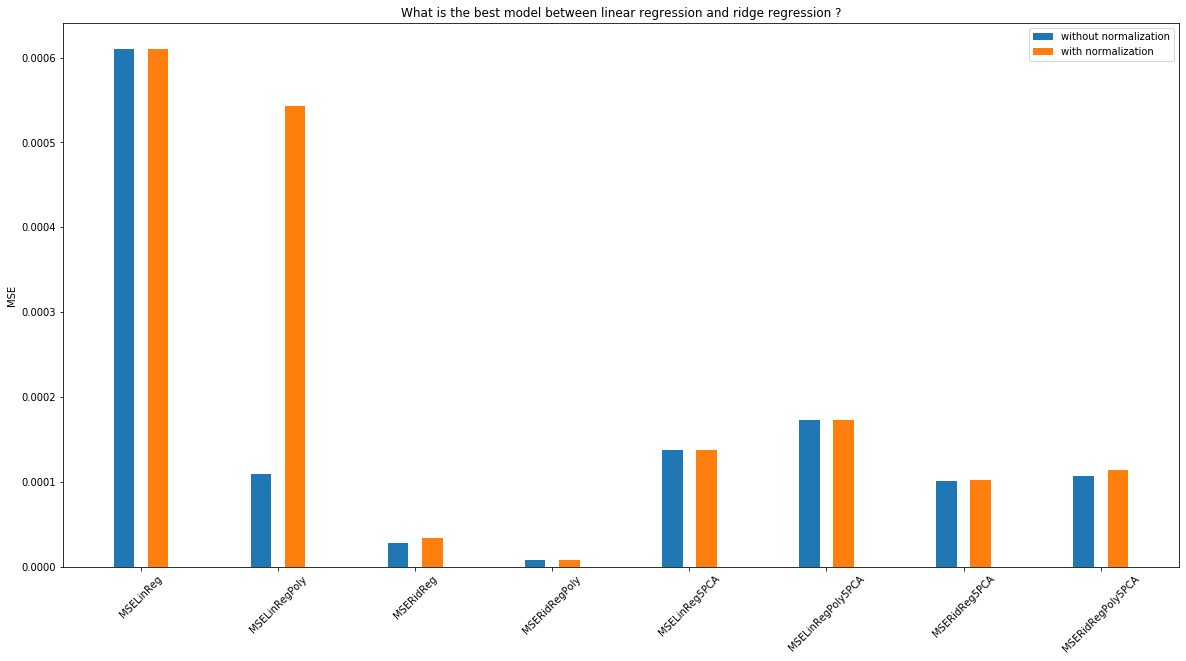

In [58]:
#here we compare linear regression and ridge regression (with/without normalization and with/without PCA)
plt.figure(figsize=(20,10))
plt.title("What is the best model between linear regression and ridge regression ?")
plt.ylabel("MSE")
barWidth = 0.25
r1 = np.arange(len(withoutNormalization))
r2 = [x + barWidth for x in r1]
plt.bar(r1, withoutNormalization.values(), width=0.15) 
plt.bar(r2, withNormalization.values(), width=0.15) 
plt.xticks([r + barWidth/2 for r in range(len(withoutNormalization))], withoutNormalization, 
           rotation=45)
plt.gca().legend(('without normalization', 'with normalization'))
plt.show()

First of all, we directly see that ridge regression with polynomial expansion gives the lowest mean square error. The second lowest MSE is ~3.64 times higher!  
It is important to notice that even with PCA applied, ridge regression with polynomial expansion still gives one of the best results (among the one with PCA applied) with an MSE of 0.00010719844617705647 while the best model is of 0.00010135941361386338 so it's MSE is only ~1.06 times higher thant the best one.  

So, since ridge regression with polynomial expansion gives the best results and is also robust when we remove some information (with PCA), we would prefere this model rather than linear regression or other variant of ridge regression in our prediction task!

From the bar plot, we can see that in most of the cases, the 'normalize' parameter is insignificant. The only exception is when we use linear regression with polynomial expansion. We can deduce that polynomial expansion and normalization shouldn't be combined in a linear regression model.    
Another strange observation is the fact that linear regression **with PCA** gives better results than **without PCA**. Our guess about this is that the dataset is noisy and then not suitable for a model designed for linearly separable data. The PCA removes part of the noise by combining some original features, making the dataset more separable and thus linear regression, then gives better performances.


In [59]:
#here we compare ridge regression with SVR
print("Ridge regression with polynomial expansion has an MSE of "+str(MSERidRegPoly) +" while SVR has an MSE of "+str(MSESVR)+\
      ", making his loss "+str(MSESVR/MSERidRegPoly)+" times bigger. We will thus prefer ridge regression with polynomial expansion.")


Ridge regression with polynomial expansion has an MSE of 7.47467846129282e-06 while SVR has an MSE of 4.611675479565552e-05, making his loss 6.169730916783699 times bigger. We will thus prefer ridge regression with polynomial expansion.


Now that we have choose our model, we will look at its prediction.

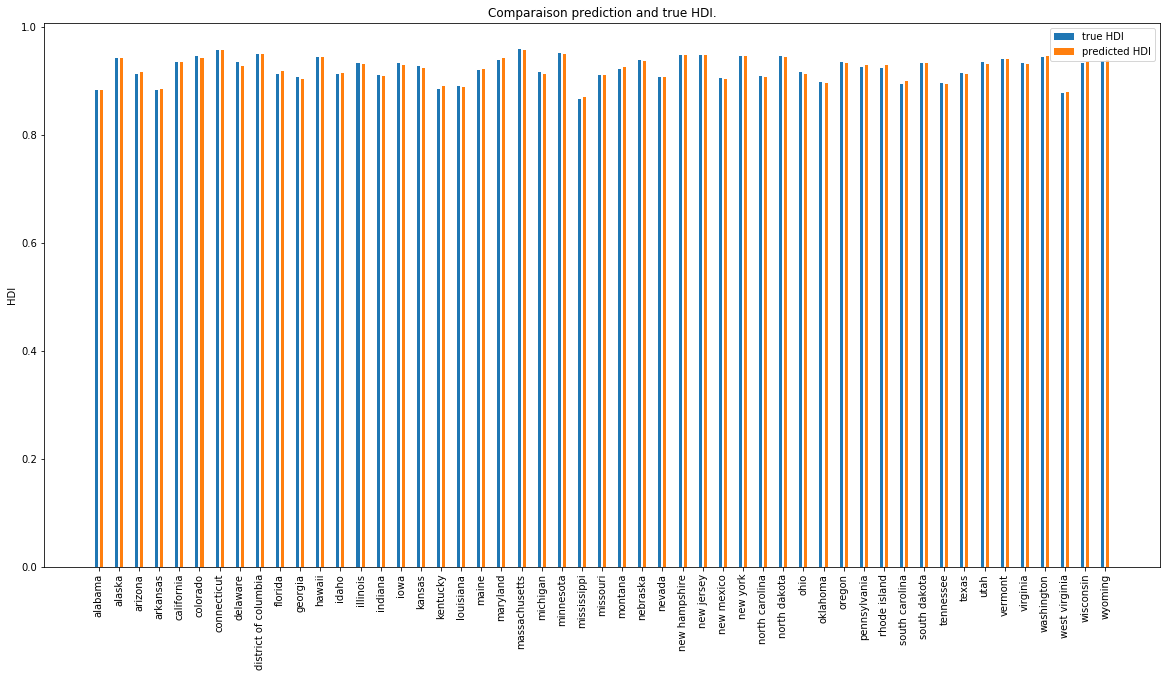

In [60]:
model_cv = regr_cv.fit(X_poly, Y_scaled)
Y_pred_scaled = model_cv.predict(X_poly)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)

#here we compare true HDI with predicted HDI
plt.figure(figsize=(20,10))
plt.title("Comparaison prediction and true HDI.")
plt.ylabel("HDI")
barWidth = 0.25
r1 = np.arange(len(Y_pred))
r2 = [x + barWidth for x in r1]
plt.bar(r1, y, width=0.15) 
plt.bar(r2, Y_pred.reshape(len(Y_pred)), width=0.15) 
plt.xticks([r + barWidth/2 for r in range(len(Y_pred))], df.State, 
           rotation='vertical')
plt.gca().legend(('true HDI', 'predicted HDI'))
plt.show()

We can see that the prediction is good. But are there some outliers (i.e. some states with really bad prediction) ?

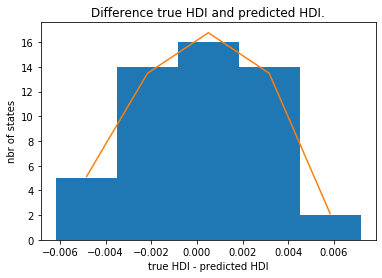

The mean of the difference is of : -8.707631565687502e-18
The standard devition is of : 0.002733985819512021


In [61]:
from scipy.interpolate import UnivariateSpline

differenceTable = y - Y_pred.reshape(len(Y_pred))

plt.title("Difference true HDI and predicted HDI.")
plt.xlabel("true HDI - predicted HDI")
plt.ylabel("nbr of states")
plt.hist(differenceTable, bins=5)
p, x = np.histogram(differenceTable, bins=5)
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=5)
plt.plot(x, f(x))
plt.show()
print("The mean of the difference is of : "+str(differenceTable.mean()))
print("The standard devition is of : "+str(np.std(differenceTable)))

We can see that there are no outliers and that the difference repartition is centered around '0' which is good since otherwise it would mean that there is a bias in our prediction.

# Visualize results when we apply 2 PCA on each classes

In [62]:
MSEDict = {'Lin. reg.': MSELinRegAll2PCA, 'Normalized lin. reg.': MSELinRegAll2PCANormalized,\
           'Lin. reg. with poly. expans.': MSELinRegAll2PCAPoly, 'Normalized lin. reg. with poly. expans.': MSELinRegAll2PCAPolyNormalized,\
          'Rid. reg.': MSERidRegAll2PCA, 'Normalized rig. reg.': MSERidRegAll2PCANormalized, 'Rid. reg. with poly. expans.': MSERidRegAll2PCAPoly,\
          'Normalized rid. reg. with poly. expans.': MSERidRegAll2PCAPolyNormalized, 'SVR': MSESVRAll2PCA}
MSEDict = sorted(MSEDict.items(), key=lambda x: x[1])
MSEDict

[('Rid. reg. with poly. expans.', 8.418132523013526e-05),
 ('Normalized rid. reg. with poly. expans.', 9.222026010299446e-05),
 ('Rid. reg.', 9.475820905295824e-05),
 ('SVR', 0.00010356786472656819),
 ('Normalized rig. reg.', 0.00010389725635062772),
 ('Lin. reg. with poly. expans.', 0.00015505064579739397),
 ('Normalized lin. reg. with poly. expans.', 0.00015505064579739408),
 ('Normalized lin. reg.', 0.00016022760935865683),
 ('Lin. reg.', 0.00016022760935865686)]

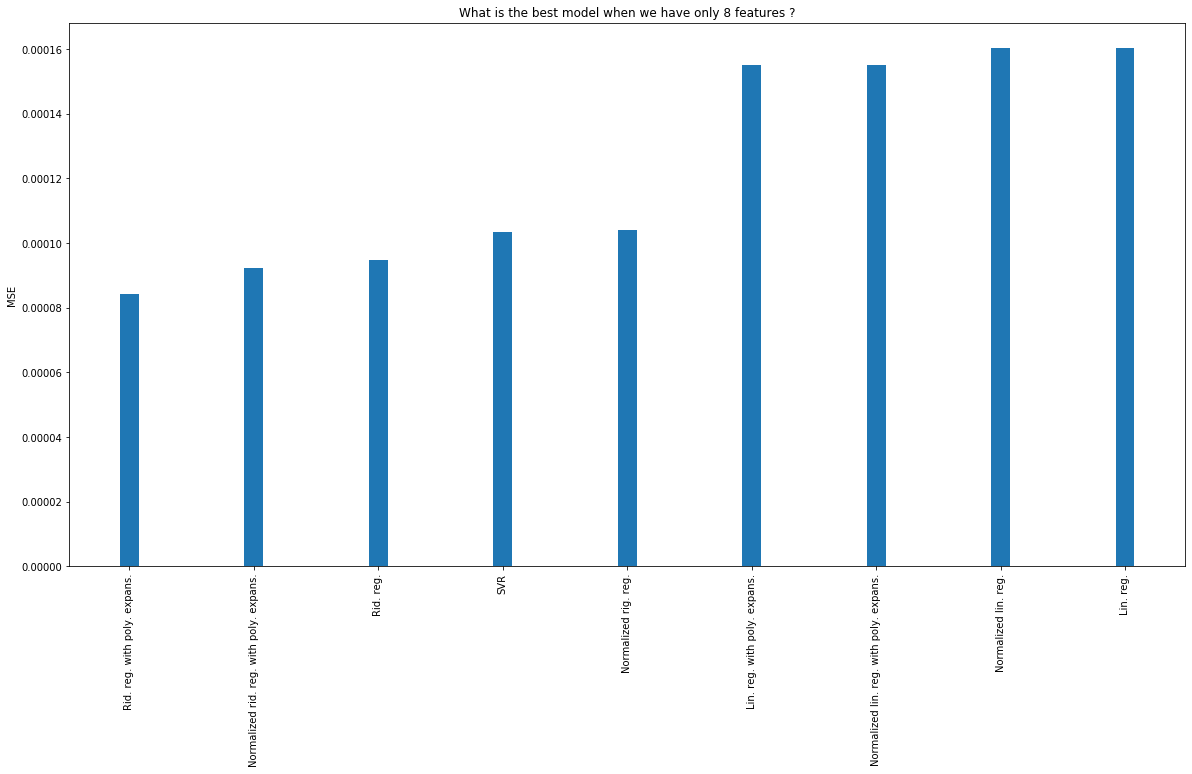

In [63]:
#here we compare the different model results when we only keep 8 features (i.e. 2 PCA for each classes)
plt.figure(figsize=(20,10))
plt.title("What is the best model when we have only 8 features ?")
plt.ylabel("MSE")
barWidth = 0.25
r1 = np.arange(len(MSEDict))
plt.bar(r1, [MSE for _, MSE in MSEDict], width=0.15) 
plt.xticks([r for r in range(len(MSEDict))], [name for name, _ in MSEDict], 
           rotation='vertical')
plt.show()

We can see that ridge regression with polynomial expansion still has the lowest MSE.  
We can also notice from the bar plot that SVR and ridge regression have almost the same MSE while linear regression always gives bigger MSE.  

The fact that linear regression have bad results gives a sign about the fact that the samples are not linearly separable.

We will once again have a closer look at the best model (i.e. ridge regression with polynomial expansion):

R2 value =  0.9952081284094967


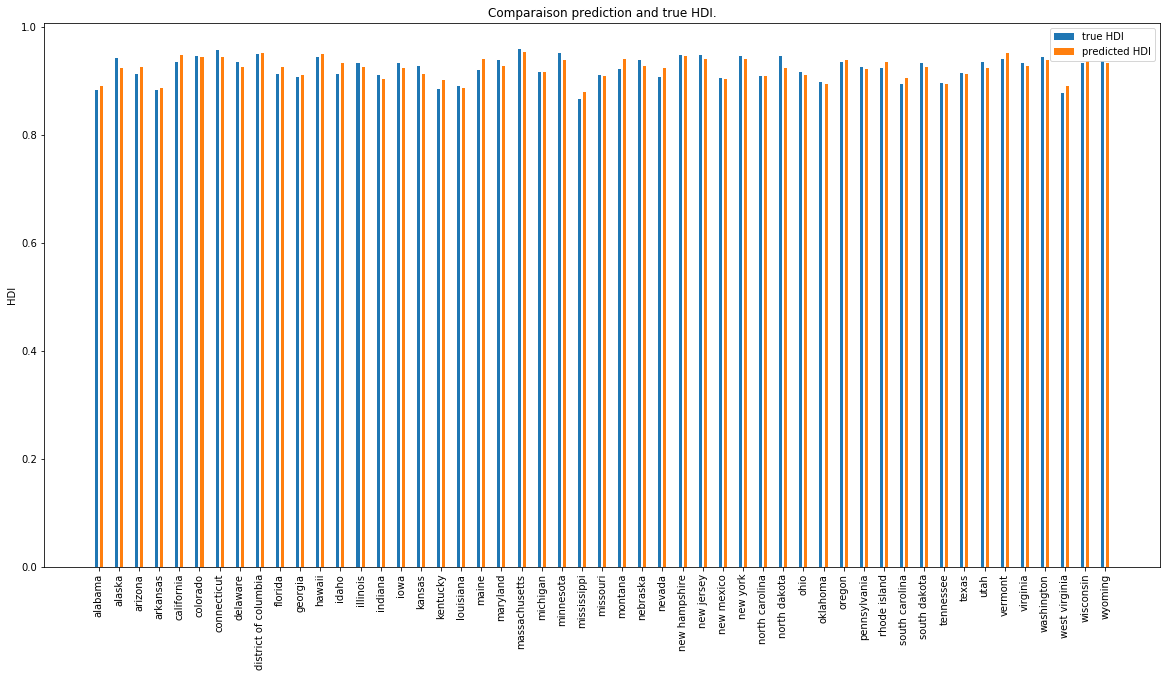

In [64]:
model_cv = regr_cv.fit(X_cat_poly, Y_scaled)
Y_pred_scaled = model_cv.predict(X_cat_poly)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print("R2 value =  {}".format(1 - mean_squared_error(Y_pred,y)/np.std(y)))

#here we compare true HDI with predicted HDI
plt.figure(figsize=(20,10))
plt.title("Comparaison prediction and true HDI.")
plt.ylabel("HDI")
barWidth = 0.25
r1 = np.arange(len(Y_pred))
r2 = [x + barWidth for x in r1]
plt.bar(r1, y, width=0.15) 
plt.bar(r2, Y_pred.reshape(len(Y_pred)), width=0.15) 
plt.xticks([r + barWidth/2 for r in range(len(Y_pred))], df.State, 
           rotation='vertical')
plt.gca().legend(('true HDI', 'predicted HDI'))
plt.show()

We can see that the prediction is not as accurate as with the full 31 features but given that here there are only 8 features, the prediction is still close to the real HDI.  

Are there some outliers (i.e. some states with really bad prediction) ?

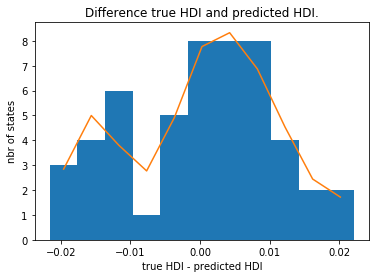

The mean of the difference is of : -4.353815782843751e-18
The standard devition is of : 0.010325037961663185


In [65]:
differenceTable = y - Y_pred.reshape(len(Y_pred))

plt.title("Difference true HDI and predicted HDI.")
plt.xlabel("true HDI - predicted HDI")
plt.ylabel("nbr of states")
plt.hist(differenceTable, bins=11)
p, x = np.histogram(differenceTable, bins=11)
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=11)
plt.plot(x, f(x))
plt.show()
print("The mean of the difference is of : "+str(differenceTable.mean()))
print("The standard devition is of : "+str(np.std(differenceTable)))

We can see that the mean of the difference is stil near '0' which is good.  
We can notice that the standard deviation increased when we applied PCA. It went from ~0.002734 to ~0.010325 (i.e. increased ~3.8 times. Since PCA remove some info from the input, this lost of precision was expected and explains the higher loss of ridge regression with polynomial expansion when we apply PCA.